# TASK-4--Stock Market Prediction using Numerical and Textual Analysis

# v.om vishnu sai kumar

In this task, we have to create a hybrid model for stock price/performance prediction using
numerical analysis of historical stock prices, and sentimental analysis
of news headlines

Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('News.csv')
df.head(7)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [4]:
#Combine the top news headlines
headlines = []
for row in range(0,len(df)):
    headlines.append(' '.join(str(x) for x in df.iloc[row,2:27]))

Cleaning the data

In [8]:
import re
#Clean the data
clean_headlines = []
for i in range(0, len(headlines)):
    clean_headlines.append(re.sub("b[(')]+", '', headlines[i] ))
    clean_headlines[i] = re.sub('b[(")]+', '', clean_headlines[i] )
    clean_headlines[i] = re.sub("\'", '', clean_headlines[i] )

In [9]:
df['Combined_News'] = clean_headlines


In [10]:
df.head(7)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,Combined_News
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",Georgia downs two Russian warplanes as countri...
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",Why wont America and Nato help us? If they won...
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",Remember that adorable 9-year-old who sang at ...
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,U.S. refuses Israel weapons to attack Iran: r...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P

In [11]:
new_df=df[['Date','Label','Combined_News']]

In [12]:
new_df.head(7)

,Date,Label,Combined_News
0,2008-08-08,0,Georgia downs two Russian warplanes as countri...
1,2008-08-11,1,Why wont America and Nato help us? If they won...
2,2008-08-12,0,Remember that adorable 9-year-old who sang at ...
3,2008-08-13,0,U.S. refuses Israel weapons to attack Iran: r...
4,2008-08-14,1,All the experts admit that we should legalise ...
5,2008-08-15,1,Mom of missing gay man: Too bad hes not a 21-y...
6,2008-08-18,0,"In an Afghan prison, the majority of female pr..."


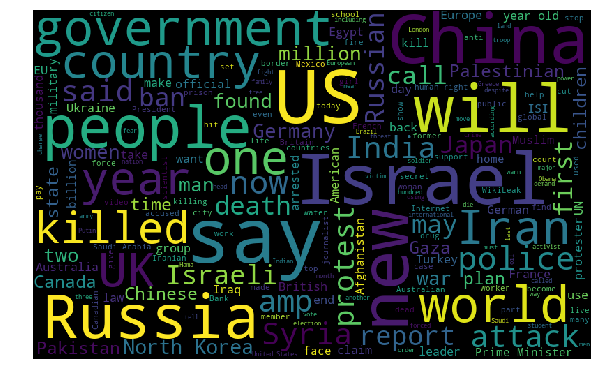

In [13]:
from wordcloud import WordCloud
all_words=' '.join([text for text in new_df['Combined_News']])
wordcloud=WordCloud(height=500,width=800,max_font_size=110,random_state=21).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

(array([ 20.,  78., 185., 386., 504., 476., 234.,  89.,  12.,   5.]),
 array([1393. , 1687.7, 1982.4, 2277.1, 2571.8, 2866.5, 3161.2, 3455.9,
        3750.6, 4045.3, 4340. ]),
 <a list of 10 Patch objects>)

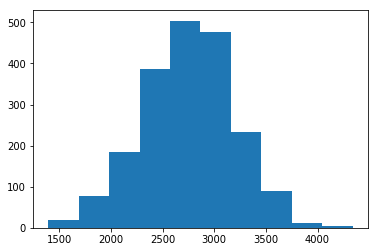

In [14]:
plt.hist(new_df['Combined_News'].str.len())



In [15]:
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer 


In [16]:
# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return  TextBlob(text).sentiment.polarity

In [17]:
# Create two new columns 'Subjectivity' & 'Polarity'
new_df['Subjectivity'] = new_df['Combined_News'].apply(getSubjectivity)
new_df['Polarity'] = new_df['Combined_News'].apply(getPolarity)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
new_df.head(7)

,Date,Label,Combined_News,Subjectivity,Polarity
0,2008-08-08,0,Georgia downs two Russian warplanes as countri...,0.267549,-0.048568
1,2008-08-11,1,Why wont America and Nato help us? If they won...,0.374806,0.121956
2,2008-08-12,0,Remember that adorable 9-year-old who sang at ...,0.536234,-0.044302
3,2008-08-13,0,U.S. refuses Israel weapons to attack Iran: r...,0.364021,0.011398
4,2008-08-14,1,All the experts admit that we should legalise ...,0.375099,0.040677
5,2008-08-15,1,Mom of missing gay man: Too bad hes not a 21-y...,0.457692,0.047756
6,2008-08-18,0,"In an Afghan prison, the majority of female pr...",0.485995,0.016759


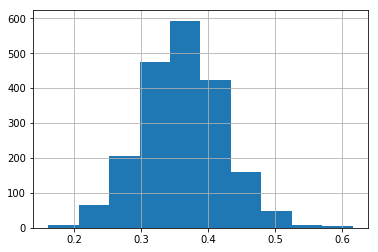

In [20]:
plt.figure(figsize=(6,4))
new_df['Subjectivity'].hist()
plt.show()

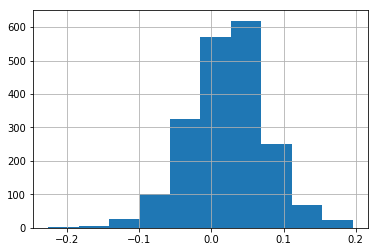

In [21]:
plt.figure(figsize=(6,4))
new_df['Polarity'].hist()
plt.show()

In [22]:
results = []

for headline in new_df['Combined_News']:
    pol_score = SentimentIntensityAnalyzer().polarity_scores(headline) # run analysis
    pol_score['headline'] = headline # add headlines for viewing
    results.append(pol_score)



In [23]:
new_df['Compound']=pd.DataFrame(results)['compound']
new_df['Positive']=pd.DataFrame(results)['pos']
new_df['Neutral']=pd.DataFrame(results)['neu']
new_df['Negative']=pd.DataFrame(results)['neg']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [24]:
new_df.head(7)

,Date,Label,Combined_News,Subjectivity,Polarity,Compound,Positive,Neutral,Negative
0,2008-08-08,0,Georgia downs two Russian warplanes as countri...,0.267549,-0.048568,-0.9975,0.057,0.717,0.226
1,2008-08-11,1,Why wont America and Nato help us? If they won...,0.374806,0.121956,-0.9814,0.099,0.712,0.189
2,2008-08-12,0,Remember that adorable 9-year-old who sang at ...,0.536234,-0.044302,-0.9778,0.052,0.811,0.137
3,2008-08-13,0,U.S. refuses Israel weapons to attack Iran: r...,0.364021,0.011398,-0.9853,0.054,0.796,0.150
4,2008-08-14,1,All the experts admit that we should legalise ...,0.375099,0.040677,-0.9899,0.091,0.705,0.204
5,2008-08-15,1,Mom of missing gay man: Too bad hes not a 21-y...,0.457692,0.047756,-0.9807,0.070,0.773,0.157
6,2008-08-18,0,"In an Afghan prison, the majority of female pr...",0.485995,0.016759,-0.9938,0.057,0.717,0.226


Importing numerical data

In [30]:
num_df=pd.read_csv('Stock.csv')
num_df.head(7)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234
5,2016-06-24,17946.630859,17946.630859,17356.339844,17400.750000,239000000,17400.750000
6,2016-06-23,17844.109375,18011.070312,17844.109375,18011.070312,98070000,18011.070312


In [31]:
num_df['HL_pct']=((num_df['High']-num_df['Low'])/num_df['Low'])*100
num_df['PCT_change']=((num_df['Close']-num_df['Open'])/num_df['Open'])*100

In [32]:
num_df.drop(columns=['Open','High','Close','Low'],inplace=True)
num_df.head(7)

,Date,Volume,Adj Close,HL_pct,PCT_change
0,2016-07-01,82160000,17949.369141,0.477039,0.140195
1,2016-06-30,133030000,17929.990234,1.235383,1.226407
2,2016-06-29,106380000,17694.679688,1.423522,1.367208
3,2016-06-28,112190000,17409.720703,1.275186,1.275186
4,2016-06-27,138740000,17140.240234,1.712064,-1.238652
5,2016-06-24,239000000,17400.750000,3.401011,-3.041690
6,2016-06-23,98070000,18011.070312,0.935664,0.935664


In [33]:
merge_data = new_df.merge(num_df, how='inner', on='Date', left_index = True)


In [34]:
merge_data.head(7)

,Date,Label,Combined_News,Subjectivity,Polarity,Compound,Positive,Neutral,Negative,Volume,Adj Close,HL_pct,PCT_change
1988,2008-08-08,0,Georgia downs two Russian warplanes as countri...,0.267549,-0.048568,-0.9975,0.057,0.717,0.226,212830000,11734.320312,3.265882,2.643703
1987,2008-08-11,1,Why wont America and Nato help us? If they won...,0.374806,0.121956,-0.9814,0.099,0.712,0.189,183190000,11782.349609,1.640868,0.449115
1986,2008-08-12,0,Remember that adorable 9-year-old who sang at ...,0.536234,-0.044302,-0.9778,0.052,0.811,0.137,173590000,11642.469727,1.558676,-1.181752
1985,2008-08-13,0,U.S. refuses Israel weapons to attack Iran: r...,0.364021,0.011398,-0.9853,0.054,0.796,0.150,182550000,11532.959961,1.575439,-0.858345
1984,2008-08-14,1,All the experts admit that we should legalise ...,0.375099,0.040677,-0.9899,0.091,0.705,0.204,159790000,11615.929688,2.335108,0.727184
1983,2008-08-15,1,Mom of missing gay man: Too bad hes not a 21-y...,0.457692,0.047756,-0.9807,0.070,0.773,0.157,215040000,11659.900391,0.949670,0.419340
1982,2008-08-18,0,"In an Afghan prison, the majority of female pr...",0.485995,0.016759,-0.9938,0.057,0.717,0.226,156290000,11479.389648,2.241620,-1.546022


In [35]:
merge_data.reset_index(inplace=True)

In [36]:
merge_data.head(7)

,index,Date,Label,Combined_News,Subjectivity,Polarity,Compound,Positive,Neutral,Negative,Volume,Adj Close,HL_pct,PCT_change
0,1988,2008-08-08,0,Georgia downs two Russian warplanes as countri...,0.267549,-0.048568,-0.9975,0.057,0.717,0.226,212830000,11734.320312,3.265882,2.643703
1,1987,2008-08-11,1,Why wont America and Nato help us? If they won...,0.374806,0.121956,-0.9814,0.099,0.712,0.189,183190000,11782.349609,1.640868,0.449115
2,1986,2008-08-12,0,Remember that adorable 9-year-old who sang at ...,0.536234,-0.044302,-0.9778,0.052,0.811,0.137,173590000,11642.469727,1.558676,-1.181752
3,1985,2008-08-13,0,U.S. refuses Israel weapons to attack Iran: r...,0.364021,0.011398,-0.9853,0.054,0.796,0.150,182550000,11532.959961,1.575439,-0.858345
4,1984,2008-08-14,1,All the experts admit that we should legalise ...,0.375099,0.040677,-0.9899,0.091,0.705,0.204,159790000,11615.929688,2.335108,0.727184
5,1983,2008-08-15,1,Mom of missing gay man: Too bad hes not a 21-y...,0.457692,0.047756,-0.9807,0.070,0.773,0.157,215040000,11659.900391,0.949670,0.419340
6,1982,2008-08-18,0,"In an Afghan prison, the majority of female pr...",0.485995,0.016759,-0.9938,0.057,0.717,0.226,156290000,11479.389648,2.241620,-1.546022


In [37]:
Combined=merge_data.drop(columns=['index','Label','Combined_News','Volume'])
Combined.head()

,Date,Subjectivity,Polarity,Compound,Positive,Neutral,Negative,Adj Close,HL_pct,PCT_change
0,2008-08-08,0.267549,-0.048568,-0.9975,0.057,0.717,0.226,11734.320312,3.265882,2.643703
1,2008-08-11,0.374806,0.121956,-0.9814,0.099,0.712,0.189,11782.349609,1.640868,0.449115
2,2008-08-12,0.536234,-0.044302,-0.9778,0.052,0.811,0.137,11642.469727,1.558676,-1.181752
3,2008-08-13,0.364021,0.011398,-0.9853,0.054,0.796,0.150,11532.959961,1.575439,-0.858345
4,2008-08-14,0.375099,0.040677,-0.9899,0.091,0.705,0.204,11615.929688,2.335108,0.727184


In [38]:
Combined=merge_data[['Date','Subjectivity','Adj Close','HL_pct','PCT_change']]
Combined.head()

,Date,Subjectivity,Adj Close,HL_pct,PCT_change
0,2008-08-08,0.267549,11734.320312,3.265882,2.643703
1,2008-08-11,0.374806,11782.349609,1.640868,0.449115
2,2008-08-12,0.536234,11642.469727,1.558676,-1.181752
3,2008-08-13,0.364021,11532.959961,1.575439,-0.858345
4,2008-08-14,0.375099,11615.929688,2.335108,0.727184


In [41]:
Combined['Date']

0       2008-08-08
1       2008-08-11
2       2008-08-12
3       2008-08-13
4       2008-08-14
5       2008-08-15
6       2008-08-18
7       2008-08-19
8       2008-08-20
9       2008-08-21
10      2008-08-22
11      2008-08-25
12      2008-08-26
13      2008-08-27
14      2008-08-28
15      2008-08-29
16      2008-09-02
17      2008-09-03
18      2008-09-04
19      2008-09-05
20      2008-09-08
21      2008-09-09
22      2008-09-10
23      2008-09-11
24      2008-09-12
25      2008-09-15
26      2008-09-16
27      2008-09-17
28      2008-09-18
29      2008-09-19
           ...    
1959    2016-05-20
1960    2016-05-23
1961    2016-05-24
1962    2016-05-25
1963    2016-05-26
1964    2016-05-27
1965    2016-05-31
1966    2016-06-01
1967    2016-06-02
1968    2016-06-03
1969    2016-06-06
1970    2016-06-07
1971    2016-06-08
1972    2016-06-09
1973    2016-06-10
1974    2016-06-13
1975    2016-06-14
1976    2016-06-15
1977    2016-06-16
1978    2016-06-17
1979    2016-06-20
1980    2016

In [42]:
from datetime import datetime
Combined['Date']=pd.to_datetime(Combined['Date'])
Combined.set_index('Date',inplace=True)
Combined.index

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


DatetimeIndex(['2008-08-08', '2008-08-11', '2008-08-12', '2008-08-13',
               '2008-08-14', '2008-08-15', '2008-08-18', '2008-08-19',
               '2008-08-20', '2008-08-21',
               ...
               '2016-06-20', '2016-06-21', '2016-06-22', '2016-06-23',
               '2016-06-24', '2016-06-27', '2016-06-28', '2016-06-29',
               '2016-06-30', '2016-07-01'],
              dtype='datetime64[ns]', name='Date', length=1989, freq=None)

In [44]:
Combined.head()

,Subjectivity,Adj Close,HL_pct,PCT_change
Date,,,,
2008-08-08,0.267549,11734.320312,3.265882,2.643703
2008-08-11,0.374806,11782.349609,1.640868,0.449115
2008-08-12,0.536234,11642.469727,1.558676,-1.181752
2008-08-13,0.364021,11532.959961,1.575439,-0.858345
2008-08-14,0.375099,11615.929688,2.335108,0.727184


In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
sc=MinMaxScaler()
new_Combined=pd.DataFrame(sc.fit_transform(Combined))
new_Combined.columns=Combined.columns
new_Combined.index=Combined.index
new_Combined.head()

,Subjectivity,Adj Close,HL_pct,PCT_change
Date,,,,
2008-08-08,0.234005,0.440894,0.242921,0.557111
2008-08-11,0.470301,0.444976,0.115545,0.439856
2008-08-12,0.825941,0.433087,0.109103,0.352719
2008-08-13,0.446541,0.423779,0.110417,0.369999
2008-08-14,0.470947,0.430832,0.169963,0.454713


In [47]:
cols=new_Combined.columns

In [48]:
train=new_Combined[:int(0.9*(len(new_Combined)))]
valid=new_Combined[int(0.9*(len(new_Combined))):]

In [49]:
from statsmodels.tsa.vector_ar.var_model import VAR
model=VAR(endog=train)
model_fit=model.fit()

prediction=model_fit.forecast(model_fit.y,steps=len(valid))
prediction=pd.DataFrame(prediction,columns=cols)
prediction.head(7)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\vector_ar\var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]


,Subjectivity,Adj Close,HL_pct,PCT_change
0,0.408930,0.861062,0.102558,0.417653
1,0.423048,0.861095,0.081745,0.416274
2,0.424548,0.861156,0.068856,0.416257
3,0.424732,0.861215,0.060800,0.416092
4,0.424765,0.861276,0.055808,0.415998
5,0.424776,0.861336,0.052713,0.415938
6,0.424780,0.861396,0.050793,0.415901


In [50]:
prediction=prediction.set_index(valid.index)
prediction.head()

,Subjectivity,Adj Close,HL_pct,PCT_change
Date,,,,
2015-09-18,0.408930,0.861062,0.102558,0.417653
2015-09-21,0.423048,0.861095,0.081745,0.416274
2015-09-22,0.424548,0.861156,0.068856,0.416257
2015-09-23,0.424732,0.861215,0.060800,0.416092
2015-09-24,0.424765,0.861276,0.055808,0.415998


In [51]:
valid.head(7)

,Subjectivity,Adj Close,HL_pct,PCT_change
Date,,,,
2015-09-18,0.242323,0.836145,0.145664,0.322886
2015-09-21,0.390027,0.846821,0.076214,0.449759
2015-09-22,0.474184,0.831546,0.110492,0.368201
2015-09-23,0.711921,0.827247,0.056217,0.398548
2015-09-24,0.371738,0.820569,0.104750,0.397524
2015-09-25,0.317932,0.830203,0.112767,0.451996
2015-09-28,0.826093,0.803618,0.149470,0.313879


In [52]:
from sklearn.metrics import mean_squared_error

In [53]:
np.sqrt(mean_squared_error(prediction['Adj Close'],valid['Adj Close']))

0.06918451352517672